📄 Dans cette page, je vais décrire le processus de nettoyage pour le sous-ensemble de données concernant **l'État de santé**

---

## I. Morbidité chronique auto-déclarée *(DataSet Groupe)* : Hamza OUADOUD

1. **Personnes avec un problème de santé ou une maladie de longue durée**,  
   par sexe, âge et statut au **regard de l'emploi**.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Importation des bibliothèques nécessaires  :**

In [7]:
import numpy as np
import pandas as pd
import eurostat
import random

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Inspection des données :**
* Affichage des données bruts

In [27]:
df = eurostat.get_data_df('hlth_silc_04')
df.sample(4)

,freq,unit,wstatus,age,sex,geo\TIME_PERIOD,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
3882,A,PC,INAC_OTH,Y65-74,T,EA20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,52.5,NaN,NaN,57.2,56.0
17862,A,PC,UNE,Y_GE16,F,TR,10.9,12.2,16.8,14.7,...,19.4,20.1,20.6,20.2,18.6,19.7,17.0,19.6,18.6,21.1
4363,A,PC,INAC_OTH,Y_GE75,F,UK,62.0,NaN,NaN,NaN,...,NaN,69.4,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN
13614,A,PC,RET,Y_GE75,T,IE,60.3,49.3,65.6,60.7,...,59.5,61.1,58.2,58.1,55.6,59.7,50.2,52.4,48.5,55.2


* Description des données : 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18744 entries, 0 to 18743
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             18744 non-null  object 
 1   unit             18744 non-null  object 
 2   wstatus          18744 non-null  object 
 3   age              18744 non-null  object 
 4   sex              18744 non-null  object 
 5   geo\TIME_PERIOD  18744 non-null  object 
 6   2008             6548 non-null   float64
 7   2009             10711 non-null  float64
 8   2010             11800 non-null  float64
 9   2011             11798 non-null  float64
 10  2012             11651 non-null  float64
 11  2013             12079 non-null  float64
 12  2014             12692 non-null  float64
 13  2015             12417 non-null  float64
 14  2016             12616 non-null  float64
 15  2017             11538 non-null  float64
 16  2018             12019 non-null  float64
 17  2019        

* Problèmes rencontrés :
    - Présence de colonnes inutiles.
    - Lignes contenant des valeurs nulles.
    - Colonnes avec des types de données inappropriés.
    - Colonnes illisibles.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Nettoyage des données :**
* Sélection des colonnes utiles : 

In [29]:
df = df[['geo\\TIME_PERIOD','age','sex','wstatus','2019']]
df.head(4)

,geo\TIME_PERIOD,age,sex,wstatus,2019
0,AL,Y16-24,F,EMP,NaN
1,AT,Y16-24,F,EMP,10.4
2,BE,Y16-24,F,EMP,NaN
3,BG,Y16-24,F,EMP,NaN


* Renommage des colonnes :

In [30]:
df = df.rename(columns={
    'geo\\TIME_PERIOD':'Geo',
    'wstatus':'Activité_situation'
})
df.head(1)

,Geo,age,sex,Activité_situation,2019
0,AL,Y16-24,F,EMP,NaN


* Remplacement des codes pays par leur nom complet :

In [31]:
ds1_coutry_code = {
    "EU": "European Union (EU6-1958, EU9-1973, EU10-1981, EU12-1986, EU15-1995, EU25-2004, EU27-2007, EU28-2013, EU27-2020)",
    "EU27_2020": "European Union - 27 countries (from 2020)",
    "EU28": "European Union - 28 countries (2013-2020)",
    "EU27_2007": "European Union - 27 countries (2007-2013)",
    "EA": "Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)",
    "EA20": "Euro area – 20 countries (from 2023)",
    "EA19": "Euro area - 19 countries  (2015-2022)",
    "EA18": "Euro area - 18 countries (2014)",
    "BE": "Belgium",
    "BG": "Bulgaria",
    "CZ": "Czechia",
    "DK": "Denmark",
    "DE": "Germany",
    "EE": "Estonia",
    "IE": "Ireland",
    "EL": "Greece",
    "ES": "Spain",
    "FR": "France",
    "HR": "Croatia",
    "IT": "Italy",
    "CY": "Cyprus",
    "LV": "Latvia",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "HU": "Hungary",
    "MT": "Malta",
    "NL": "Netherlands",
    "AT": "Austria",
    "PL": "Poland",
    "PT": "Portugal",
    "RO": "Romania",
    "SI": "Slovenia",
    "SK": "Slovakia",
    "FI": "Finland",
    "SE": "Sweden",
    "IS": "Iceland",
    "NO": "Norway",
    "CH": "Switzerland",
    "UK": "United Kingdom",
    "ME": "Montenegro",
    "MK": "North Macedonia",
    "AL": "Albania",
    "RS": "Serbia",
    "TR": "Türkiye",
    "XK": "Kosovo*"
}

df['Geo'] = df['Geo'].replace(ds1_coutry_code)

* Remplacement des codes de sexe par leur nom complet :

In [32]:
for i in range(len(df)) : 
    if df.loc[i,'sex'] == 'M' : 
        df.loc[i,'sex'] = 'Male'
    elif df.loc[i,'sex'] == 'F' : 
        df.loc[i,'sex'] ='Female'
    else : 
        df.loc[i,'sex'] = 'Total'

* Remplacement des codes d'activité :


In [33]:
# Suppression des lignes où 'Activité_situation' contient 'EMP' ou 'INAC_OTH'
df = df[~df['Activité_situation'].isin(['EMP', 'INAC_OTH'])]

ds1_activity_code = {
    "POP": "Population",
    "SAL": "Salariés",
    "NSAL": "Personnes_occupées_sauf_salariés",
    "NEMP": "Personnes_non_occupées",
    "UNE": "Chômeurs",
    "RET": "Retraités",
}

# Remplacer les codes dans 'Activité_situation' par les descriptions complètes
df['Activité_situation'] = df['Activité_situation'].replace(ds1_activity_code)

* Remplissage des valeurs manquantes pour l'année 2018 :


In [ ]:
# Remplir les valeurs manquantes de l'année 2019 par les valeurs de l'année précédente (2018)
df['2019'] = df.groupby('Geo')['2019'].fillna(method='ffill')

# Garder uniquement les lignes avec des données valides pour 2019 en cas que toutes les années contient des valeur null
df = df[df['2019'].notna()]  

* Filtrer le DataFrame pour inclure uniquement les lignes avec 'TOTAL' pour sexe

In [35]:
df = df[df['sex'] =="Total"]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Présentation des données final :**
* Affichage des données après nettoyage :

In [38]:
df.head(7)

,Geo,age,sex,Activité_situation,2019
4680,Albania,Y16-24,Total,Personnes_non_occupées,2.3
4681,Austria,Y16-24,Total,Personnes_non_occupées,22.6
4682,Belgium,Y16-24,Total,Personnes_non_occupées,10.6
4683,Bulgaria,Y16-24,Total,Personnes_non_occupées,3.7
4684,Switzerland,Y16-24,Total,Personnes_non_occupées,16.7
4685,Cyprus,Y16-24,Total,Personnes_non_occupées,9.0
4686,Czechia,Y16-24,Total,Personnes_non_occupées,9.9


* Pivotage des données :

In [45]:
# Création d'un tableau croisé dynamique à partir du DataFrame 'df'.
pivot_df = df.pivot_table(
    index=['Geo'],  
    columns='Activité_situation',  
    values='2019',  
).reset_index()

# Suppression des lignes contenant des valeurs manquantes (NaN) dans le DataFrame.
pivot_df = pivot_df.dropna()

# Arrondi des valeurs numériques du DataFrame à deux décimales.
pivot_df = pivot_df.round(2)

pivot_df.head(6)

Activité_situation,Geo,Chômeurs,Personnes_non_occupées,Personnes_occupées_sauf_salariés,Population,Retraités,Salariés
0,Albania,15.52,33.49,24.14,28.33,58.25,12.95
1,Austria,54.72,50.06,32.65,40.13,65.61,26.45
2,Belgium,35.54,37.41,20.48,26.99,38.24,18.02
3,Bulgaria,14.22,31.85,19.85,24.14,52.12,21.67
4,Croatia,37.78,46.99,32.42,38.96,74.52,22.07
5,Cyprus,50.74,55.69,56.42,46.76,83.20,36.65


* Sauvegarder le résultat


In [13]:
pivot_df.to_excel('Personnes_avec_problème_santé_ou_maladie_longue_durée_2018.xlsx', index=False)

**2.** **Personnes avec un problème de santé ou une maladie de longue durée**,  
   par sexe, âge et **d'éducation atteint**.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Inspection des données :**
* Affichage des données brutes :

In [53]:
df2 = eurostat.get_data_df('hlth_silc_05')
df2.sample(4)

,freq,unit,isced11,age,sex,geo\TIME_PERIOD,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1472,A,PC,ED0-2,Y55-64,M,EL,36.5,35.3,38.0,36.5,...,35.5,34.8,29.4,29.1,27.3,26.3,31.3,31.2,29.6,24.7
7791,A,PC,TOTAL,Y25-34,F,TR,13.7,15.1,14.6,14.7,...,16.7,20.1,15.5,18.3,18.0,19.1,15.4,15.9,15.6,17.0
1780,A,PC,ED0-2,Y75-84,T,DE,68.6,68.7,68.6,70.8,...,71.5,71.2,68.5,67.5,66.9,65.4,NaN,NaN,71.5,68.3
3923,A,PC,ED3_4,Y65-74,F,EU27_2007,54.9,54.1,54.3,53.7,...,54.6,57.4,58.0,58.0,57.2,56.3,NaN,NaN,NaN,NaN


* Description des données : 

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9624 entries, 0 to 9623
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             9624 non-null   object 
 1   unit             9624 non-null   object 
 2   isced11          9624 non-null   object 
 3   age              9624 non-null   object 
 4   sex              9624 non-null   object 
 5   geo\TIME_PERIOD  9624 non-null   object 
 6   2008             6659 non-null   float64
 7   2009             6678 non-null   float64
 8   2010             7352 non-null   float64
 9   2011             7360 non-null   float64
 10  2012             7289 non-null   float64
 11  2013             7565 non-null   float64
 12  2014             7970 non-null   float64
 13  2015             8223 non-null   float64
 14  2016             8110 non-null   float64
 15  2017             7332 non-null   float64
 16  2018             7510 non-null   float64
 17  2019          

* Problèmes rencontrés :
    - Présence de colonnes inutiles.
    - Lignes contenant des valeurs nulles.
    - Colonnes illisibles.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Nettoyage des données :**
* Sélection des colonnes utiles :

In [55]:
df2 = df2[['geo\\TIME_PERIOD','age','sex','isced11','2019']]
df2.sample(3)

,geo\TIME_PERIOD,age,sex,isced11,2019
4800,SE,Y16-24,M,ED5-8,NaN
2445,TR,Y16-24,M,ED3_4,9.1
8887,SI,Y75-84,T,TOTAL,70.9


* Renommage des colonnes : 

In [56]:
df2 = df2.rename(columns={
    'geo\\TIME_PERIOD':'Geo',
    'isced11':'Type_Education'
})
df2.head(3)

,Geo,age,sex,Type_Education,2019
0,AL,Y16-24,F,ED0-2,4.0
1,AT,Y16-24,F,ED0-2,17.9
2,BE,Y16-24,F,ED0-2,14.2


* Remplacement des codes pays par leur nom complet :

In [57]:
ds2_coutry_code = {
    "EU": "Union européenne (UE6-1958, UE9-1973, UE10-1981, UE12-1986, UE15-1995, UE25-2004, UE27-2007, UE28-2013, UE27-2020)",
    "EU27_2020": "Union européenne - 27 pays (à partir de 2020)",
    "EU28": "Union européenne - 28 pays (2013-2020)",
    "EU27_2007": "Union européenne - 27 pays (2007-2013)",
    "EA": "Zone euro (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)",
    "EA20": "Zone euro - 20 pays (à partir de 2023)",
    "EA19": "Zone euro - 19 pays (2015-2022)",
    "EA18": "Zone euro - 18 pays (2014)",
    "BE": "Belgique",
    "BG": "Bulgarie",
    "CZ": "Tchéquie",
    "DK": "Danemark",
    "DE": "Allemagne",
    "EE": "Estonie",
    "IE": "Irlande",
    "EL": "Grèce",
    "ES": "Espagne",
    "FR": "France",
    "HR": "Croatie",
    "IT": "Italie",
    "CY": "Chypre",
    "LV": "Lettonie",
    "LT": "Lituanie",
    "LU": "Luxembourg",
    "HU": "Hongrie",
    "MT": "Malte",
    "NL": "Pays-Bas",
    "AT": "Autriche",
    "PL": "Pologne",
    "PT": "Portugal",
    "RO": "Roumanie",
    "SI": "Slovénie",
    "SK": "Slovaquie",
    "FI": "Finlande",
    "SE": "Suède",
    "IS": "Islande",
    "NO": "Norvège",
    "CH": "Suisse",
    "UK": "United Kingdom",
    "ME": "Monténégro",
    "MK": "Macédoine du Nord",
    "AL": "Albanie",
    "RS": "Serbie",
    "TR": "Turquie",
    "XK": "Kosovo*"
}
df2['Geo'] = df2['Geo'].replace(ds2_coutry_code)

* Remplacement des codes de sexe par leur nom complet :

In [58]:
df2['sex'] = df2['sex'].replace({'M': 'Male', 'F': 'Female','T':'Total'})

* Remplacement des codes d'education :

In [60]:
# Suppression des lignes où 'Type_Education' contient 'TOTAL'
df2 = df2[~df2['Type_Education'].isin(['TOTAL'])]

ds2_education_code = {
    "ED0-2": "Niv_Primaire",
    "ED3_4": "Niv_Secondaire",
    "ED5-8": "Niv_Supérieur",
}

# Remplacer les codes dans 'Type_Education' par les descriptions complètes
df2['Type_Education'] = df2['Type_Education'].replace(ds2_education_code)
df2.sample(3)


,Geo,age,sex,Type_Education,2019
633,Bulgarie,Y25-29,Total,Niv_Primaire,NaN
4520,Lettonie,Y_GE75,Male,Niv_Secondaire,80.7
5825,Slovénie,Y45-49,Male,Niv_Supérieur,NaN


* Remplissage des valeurs manquantes pour l'année 2019 :

In [ ]:
# Remplir les valeurs manquantes de l'année 2019 par les valeurs de l'année précédente (2018)
df2['2019'] = df2.groupby('Geo')['2019'].fillna(method='ffill')

# Garder uniquement les lignes avec des données valides pour 2019 en cas que toutes les années contient des valeur null
df2 = df2[df2['2019'].notna()]  

* Filtrer le DataFrame pour inclure uniquement les lignes avec 'TOTAL' pour sexe

In [63]:
df2 = df2[df2['sex'] =="Total"]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Présentation des données final :**
* Affichage des données après nettoyage 

In [64]:
df2.head(7)

,Geo,age,sex,Type_Education,2019
90,Albanie,Y16-24,Total,Niv_Primaire,4.0
91,Autriche,Y16-24,Total,Niv_Primaire,19.3
92,Belgique,Y16-24,Total,Niv_Primaire,12.2
93,Bulgarie,Y16-24,Total,Niv_Primaire,3.1
94,Suisse,Y16-24,Total,Niv_Primaire,21.8
95,Chypre,Y16-24,Total,Niv_Primaire,10.9
97,Allemagne,Y16-24,Total,Niv_Primaire,18.7


* Pivotage des données :

In [65]:
pivot_df2 = df2.pivot_table(
    index=['Geo'],  
    columns='Type_Education',  
    values='2019',  
).reset_index()

pivot_df2 = pivot_df2.dropna()
# preserve 2 nombre aprés la virgule
pivot_df2 = pivot_df2.round(2)


pivot_df2.head(10)

Type_Education,Geo,Niv_Primaire,Niv_Secondaire,Niv_Supérieur
0,Albanie,32.55,26.91,32.13
1,Allemagne,49.12,43.37,38.51
2,Autriche,47.93,37.04,34.68
3,Belgique,34.11,25.28,20.81
4,Bulgarie,28.01,26.26,25.98
5,Chypre,54.96,43.17,38.99
6,Croatie,47.84,35.03,36.01
7,Danemark,37.14,31.89,30.82
8,Espagne,34.65,26.77,24.44
9,Estonie,55.50,44.73,45.14


* Sauvegarder le résultat

In [25]:
pivot_df2.to_excel('Personnes_avec_problème_santé_ou_maladie_longue_durée_2018_Education.xlsx', index=False)

**3.** **Personnes avec un problème de santé ou une maladie de longue durée**,  
   par sexe, âge et **degré d'urbanisation**.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Inspection des données :**
* Affichage des données bruts

In [88]:
df3 = eurostat.get_data_df('hlth_silc_19')
df3.sample(5)

,freq,deg_urb,age,sex,unit,geo\TIME_PERIOD,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1957,A,DEG1,Y_GE85,M,PC,LU,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2635,A,DEG2,Y25-29,T,PC,RS,NaN,NaN,NaN,NaN,...,NaN,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7702,A,TOTAL,Y_GE65,F,PC,LU,38.8,42.5,42.8,47.0,...,42.6,43.5,51.2,49.2,45.3,43.1,41.3,41.4,37.8,38.9
6663,A,TOTAL,Y25-29,T,PC,SI,NaN,NaN,9.9,13.8,...,11.4,11.7,17.6,19.8,16.1,14.8,13.8,16.2,14.4,16.6
1522,A,DEG1,Y_GE16,F,PC,EE,NaN,44.3,38.3,38.3,...,48.8,49.1,46.1,46.3,50.5,47.3,46.0,48.4,50.1,46.9


* Description des données : 

In [67]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8052 entries, 0 to 8051
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             8052 non-null   object 
 1   deg_urb          8052 non-null   object 
 2   age              8052 non-null   object 
 3   sex              8052 non-null   object 
 4   unit             8052 non-null   object 
 5   geo\TIME_PERIOD  8052 non-null   object 
 6   2003             1046 non-null   float64
 7   2004             2524 non-null   float64
 8   2005             5029 non-null   float64
 9   2006             5101 non-null   float64
 10  2007             5599 non-null   float64
 11  2008             6015 non-null   float64
 12  2009             6016 non-null   float64
 13  2010             6639 non-null   float64
 14  2011             6634 non-null   float64
 15  2012             6697 non-null   float64
 16  2013             6854 non-null   float64
 17  2014          

* Problèmes rencontrés :
    - Présence de colonnes inutiles.
    - Lignes contenant des valeurs nulles.
    - Colonnes illisibles.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Nettoyage des données :**
* Sélection des colonnes utiles : 

In [89]:
df3 = df3[['geo\\TIME_PERIOD','sex','age','deg_urb','2019']]
df3.head(5)

,geo\TIME_PERIOD,sex,age,deg_urb,2019
0,CH,F,TOTAL,DEG1,NaN
1,DE,F,TOTAL,DEG1,NaN
2,CH,M,TOTAL,DEG1,NaN
3,DE,M,TOTAL,DEG1,NaN
4,CH,T,TOTAL,DEG1,NaN


* Renommage des colonnes :

In [90]:
df3 = df3.rename(columns={
    'geo\\TIME_PERIOD':'Geo',
    'deg_urb':'Degré_urbanisation'
})
df3.head(2)

,Geo,sex,age,Degré_urbanisation,2019
0,CH,F,TOTAL,DEG1,NaN
1,DE,F,TOTAL,DEG1,NaN


* Remplacement des codes pays par leur nom complet :

In [91]:
ds3_coutry_code = {
    "EU": "Union européenne (UE6-1958, UE9-1973, UE10-1981, UE12-1986, UE15-1995, UE25-2004, UE27-2007, UE28-2013, UE27-2020)",
    "EU27_2020": "Union européenne - 27 pays (à partir de 2020)",
    "EU28": "Union européenne - 28 pays (2013-2020)",
    "EU27_2007": "Union européenne - 27 pays (2007-2013)",
    "EA": "Zone euro (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)",
    "EA20": "Zone euro - 20 pays (à partir de 2023)",
    "EA19": "Zone euro - 19 pays (2015-2022)",
    "EA18": "Zone euro - 18 pays (2014)",
    "BE": "Belgique",
    "BG": "Bulgarie",
    "CZ": "Tchéquie",
    "DK": "Danemark",
    "DE": "Allemagne",
    "EE": "Estonie",
    "IE": "Irlande",
    "EL": "Grèce",
    "ES": "Espagne",
    "FR": "France",
    "HR": "Croatie",
    "IT": "Italie",
    "CY": "Chypre",
    "LV": "Lettonie",
    "LT": "Lituanie",
    "LU": "Luxembourg",
    "HU": "Hongrie",
    "MT": "Malte",
    "NL": "Pays-Bas",
    "AT": "Autriche",
    "PL": "Pologne",
    "PT": "Portugal",
    "RO": "Roumanie",
    "SI": "Slovénie",
    "SK": "Slovaquie",
    "FI": "Finlande",
    "SE": "Suède",
    "IS": "Islande",
    "NO": "Norvège",
    "CH": "Suisse",
    "UK": "United Kingdom",
    "MK": "Macédoine du Nord",
    "AL": "Albanie",
    "RS": "Serbie"
}
df3['Geo'] = df3['Geo'].replace(ds3_coutry_code)

* Remplacement des codes de Degré d'urbanisation :

In [92]:
# Suppression des lignes où 'Activité_situation' contient 'TOTAL' 
df3 = df3[~df3['Degré_urbanisation'].isin(['TOTAL'])]

ds3_Degré_urbanisation_code = {
    "DEG1": "Villes",
    "DEG2": "Villes_moins_peuplées_et_banlieues",
    "DEG3": "Zones_rurales"
}

# Remplacer les codes dans 'Degré_urbanisation' par les descriptions complètes
df3['Degré_urbanisation'] = df3['Degré_urbanisation'].replace(ds3_Degré_urbanisation_code)

* Remplissage des valeurs manquantes pour l'année 2019 :

In [ ]:
# Remplir les valeurs manquantes de l'année 2019 par les valeurs de l'année précédente (2018)
df3['2019'] = df3.groupby('Geo')['2019'].fillna(method='ffill')

# Garder uniquement les lignes avec des données valides pour 2019 en cas que toutes les années contient des valeur null
df3 = df3[df3['2019'].notna()]  

* Remplacement des codes de sexe par leur nom complet :

In [95]:
df3['sex'] = df3['sex'].replace({'M': 'Male', 'F': 'Female','T':'Total'})

* Filtrer le DataFrame pour inclure uniquement les lignes avec 'TOTAL' pour sexe

In [97]:
df3 = df3[df3['sex'] =="Total"]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Présentation des données final :**
* Affichage des données après nettoyage :

In [98]:
df3.sample(6)

,Geo,sex,age,Degré_urbanisation,2019
4255,Estonie,Total,Y16-29,Zones_rurales,22.4
1344,Bulgarie,Total,Y65-74,Villes,34.8
5502,"Zone euro (EA11-1999, EA12-2001, EA13-2007, EA...",Total,Y75-84,Zones_rurales,67.0
849,Zone euro - 20 pays (à partir de 2023),Total,Y35-44,Villes,26.1
4989,Albanie,Total,Y45-54,Zones_rurales,19.4
4143,Lituanie,Total,Y16-24,Zones_rurales,28.2


* Pivotage des données :

In [102]:
pivot_df3 = df3.pivot_table(
    index=['Geo','age'],  
    columns='Degré_urbanisation',  
    values='2019',  
).reset_index()

pivot_df3 = pivot_df3.dropna()
# preserve 2 nombre aprés la virgule
pivot_df3 = pivot_df3.round(2)

pivot_df3.sample(7)

Degré_urbanisation,Geo,age,Villes,Villes_moins_peuplées_et_banlieues,Zones_rurales
482,Suisse,Y16-29,22.1,21.3,20.7
127,Danemark,Y_GE85,55.9,48.9,44.7
392,Pologne,Y45-64,44.2,45.6,42.4
615,Zone euro - 18 pays (2014),Y45-54,35.7,35.5,35.7
621,Zone euro - 18 pays (2014),Y_GE65,58.1,57.2,61.9
649,Zone euro - 20 pays (à partir de 2023),Y65-74,53.2,52.7,57.7
358,Norvège,Y35-44,38.6,30.7,34.3


* Sauvegarder le résultat

In [35]:
pivot_df3.to_excel('Personnes_avec_problème_santé_ou_maladie_longue_durée_2018_Degré_urbanisation.xlsx', index=False)

**4.** **Personnes avec un problème de santé ou une maladie de longue durée**,  
   par sexe, âge et statut au **type de maladie et education**.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Inspection des données :**
* Affichage des données bruts

In [103]:
df4 = eurostat.get_data_df('hlth_ehis_cd1e')
df4.sample(6)

,freq,unit,hlth_pb,isced11,sex,age,geo\TIME_PERIOD,2014,2019
85938,A,PC,URIN,ED3_4,T,TOTAL,IS,7.2,10.2
6912,A,PC,ARTHRO,ED0-2,T,Y45-54,LV,10.1,14.8
7992,A,PC,ARTHRO,ED3_4,M,Y_GE65,LT,9.2,17.8
87197,A,PC,URIN,ED5-8,M,Y45-64,RO,0.5,0.3
13938,A,PC,ASTHMA,ED3_4,T,Y25-64,LT,1.8,NaN
48215,A,PC,HBLLIP,ED5-8,T,Y15-64,IT,NaN,6.9


In [104]:
df4 = df4[['geo\\TIME_PERIOD','age','sex','hlth_pb','isced11','2019']]
df4.head(3)

,geo\TIME_PERIOD,age,sex,hlth_pb,isced11,2019
0,AT,TOTAL,F,ALLGY,ED0-2,19.0
1,BE,TOTAL,F,ALLGY,ED0-2,18.8
2,BG,TOTAL,F,ALLGY,ED0-2,4.4


* Renommage des colonnes :

In [105]:
df4 = df4.rename(columns={
    'geo\\TIME_PERIOD':'Geo',
    'hlth_pb':'Problèmes_santé',
    'isced11':'Type_Education'
})
df4.head(1)

,Geo,age,sex,Problèmes_santé,Type_Education,2019
0,AT,TOTAL,F,ALLGY,ED0-2,19.0


* Remplacement des codes pays par leur nom complet :

In [106]:
ds4_coutry_code = {
    "EU27_2020": "Union européenne - 27 pays (à partir de 2020)",
    "EU28": "Union européenne - 28 pays (2013-2020)",
    "BE": "Belgique",
    "BG": "Bulgarie",
    "CZ": "Tchéquie",
    "DK": "Danemark",
    "DE": "Allemagne",
    "EE": "Estonie",
    "IE": "Irlande",
    "EL": "Grèce",
    "ES": "Espagne",
    "FR": "France",
    "HR": "Croatie",
    "IT": "Italie",
    "CY": "Chypre",
    "LV": "Lettonie",
    "LT": "Lituanie",
    "LU": "Luxembourg",
    "HU": "Hongrie",
    "MT": "Malte",
    "NL": "Pays-Bas",
    "AT": "Autriche",
    "PL": "Pologne",
    "PT": "Portugal",
    "RO": "Roumanie",
    "SI": "Slovénie",
    "SK": "Slovaquie",
    "FI": "Finlande",
    "SE": "Suède",
    "IS": "Islande",
    "NO": "Norvège",
    "UK": "United Kingdom",
    "RS": "Serbie",
    "TR": "Turquie"
}

df4['Geo'] = df4['Geo'].replace(ds4_coutry_code)

* Remplacement des codes de sexe par leur nom complet :

In [107]:
df4['sex'] = df4['sex'].replace({'M': 'Male', 'F': 'Female','T':'Total'})

* Remplacement des codes d'education et type de malade :

In [108]:
ds4_maladie_code = {
    "ARTHRO": "Arthrose",
    "LW_CHR_BACK": "Dos_chronique",
    "NECK": "Cou_chronique",
    "ASTHMA": "Asthme",
    "CHR_LW_RES": "Resp_chronique",
    "HRT_CHR_ATK": "Crise_cardiaque",
    "CHRT_ANGPEC": "Mal_coronaire",
    "HBLPR": "HTA",
    "HBLLIP": "Lipides_haut",
    "STRK_CHR": "AVC",
    "CIRRHOSIS": "Cirrhose",
    "URIN": "Incontinence",
    "KIDNEY": "Reins",
    "DIAB": "Diabète",
    "ALLGY": "Allergie",
}

# Suppression des lignes où 'Type_Education' contient 'TOTAL'
df4 = df4[~df4['Type_Education'].isin(['TOTAL'])]

ds4_education_code = {
    "ED0-2": "Niv_Primaire",
    "ED3_4": "Niv_Secondaire",
    "ED5-8": "Niv_Supérieur",
}

# Remplacer les codes dans 'Problèmes_santé' par les descriptions complètes
df4['Problèmes_santé'] = df4['Problèmes_santé'].replace(ds4_maladie_code)

# Remplacer les codes dans 'Type_Education' par les descriptions complètes
df4['Type_Education'] = df4['Type_Education'].replace(ds4_education_code)

* Remplissage des valeurs manquantes pour l'année 2019 :

In [ ]:
# Remplir les valeurs manquantes de l'année 2019 par les valeurs de l'année précédente (2014)
df4['2019'] = df4.groupby('Geo')['2019'].fillna(method='ffill')

# Garder uniquement les lignes avec des données valides pour 2019 en cas que toutes les années contient des valeur null
df4 = df4[df4['2019'].notna()]  


* Filtrer le DataFrame pour inclure uniquement les lignes avec 'TOTAL' pour sexe

In [114]:
df4 = df4[df4['sex'] =="Total"]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Présentation des données final :**
* Affichage des données après nettoyage :

In [115]:
df4.sample(7)

,Geo,age,sex,Problèmes_santé,Type_Education,2019
13730,France,TOTAL,Total,Asthme,Niv_Secondaire,7.7
46286,Union européenne - 27 pays (à partir de 2020),Y45-64,Total,Lipides_haut,Niv_Primaire,19.2
73323,Allemagne,Y25-34,Total,Cou_chronique,Niv_Primaire,9.3
74712,Espagne,Y15-64,Total,Cou_chronique,Niv_Secondaire,8.7
76434,Estonie,Y_GE75,Total,Cou_chronique,Niv_Supérieur,15.8
59119,Pologne,Y15-64,Total,Crise_cardiaque,Niv_Supérieur,0.3
89681,Union européenne - 27 pays (à partir de 2020),Y15-24,Total,Asthme,Niv_Supérieur,18.2


* Pivotage de dataFrame df4 :

In [167]:
# Création d'un tableau croisé dynamique à partir du DataFrame 'df'.
pivot_df4 = df4.pivot_table(
    index=['Geo'],  
    columns='Problèmes_santé',  
    values='2019',  
).reset_index()

# Suppression des lignes contenant des valeurs manquantes (NaN) dans le DataFrame.
pivot_df4 = pivot_df4.dropna()

# Arrondi des valeurs numériques du DataFrame à deux décimales.
pivot_df4 = pivot_df4.round(2)

pivot_df4.head(6)

Problèmes_santé,Geo,AVC,Allergie,Arthrose,Asthme,Cirrhose,Cou_chronique,Crise_cardiaque,DPR_CHR,Diabète,Dos_chronique,HTA,Incontinence,Lipides_haut,Mal_coronaire,Reins,Resp_chronique
0,Allemagne,1.95,31.47,14.52,7.86,0.43,20.83,2.11,11.43,7.61,27.96,23.29,7.43,18.77,3.86,2.28,5.40
1,Autriche,1.53,22.73,13.28,4.40,0.34,18.00,1.65,7.83,5.91,24.61,20.47,4.39,20.60,3.23,2.49,4.55
2,Belgique,0.64,18.70,17.66,5.55,0.80,13.60,0.72,6.84,5.66,23.31,16.46,4.46,20.89,1.33,0.85,3.70
3,Bulgarie,2.32,4.10,5.31,2.13,0.28,3.92,1.43,2.70,6.16,9.30,26.34,2.50,2.92,6.56,4.26,3.09
4,Chypre,1.62,7.09,10.12,3.90,0.26,9.69,3.32,5.26,7.96,15.51,20.90,3.65,24.55,2.35,2.37,3.04
5,Croatie,2.29,17.87,9.11,4.54,0.82,25.51,2.62,9.47,8.75,34.44,27.77,10.45,19.02,6.82,5.71,5.10


* Sauvegarder le résultat

In [77]:
pivot_df4.to_excel('Personnes_avec_problème_santé_ou_maladie_longue_durée_et_Type_Education_2019.xlsx', index=False)

* Application de l'analyse de composante principale (ACP) sur cette DataFrame

In [168]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

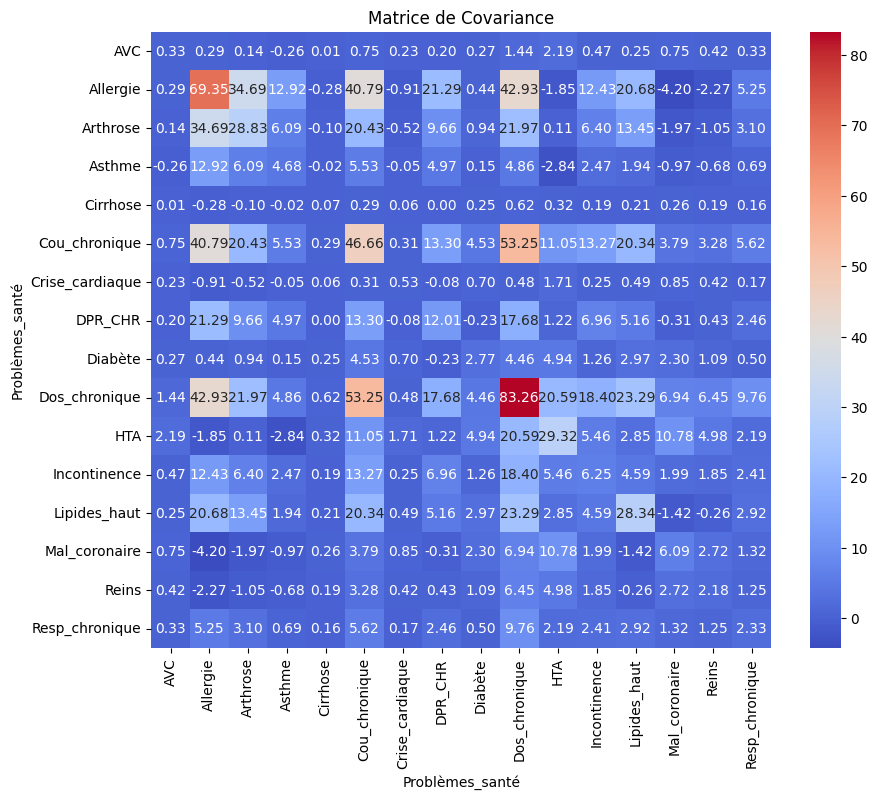

In [169]:
pivot_df4 = pivot_df4[~pivot_df4['Geo'].isin(['Union européenne - 28 pays (2013-2020)', 'Union européenne - 27 pays (à partir de 2020)'])]


# Sélectionner les colonnes numériques
X4 = pivot_df4.select_dtypes(include=['number'])

# Calcul de la matrice de covariance
cov_matrix = pd.DataFrame(X4).cov()

# Visualiser la matrice de covariance
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Covariance')
plt.show()

In [170]:
# Centrage des données (soustraction de la moyenne) 
# Nous ne faisons pas la réduction car les données sont dans la même unité qui est le pourcentage
X_centered = X4 - np.mean(X4, axis=0)
# Afficher les premières lignes
print("Données centrées :")
X_centered.head(5)

Données centrées :


Problèmes_santé,AVC,Allergie,Arthrose,Asthme,Cirrhose,Cou_chronique,Crise_cardiaque,DPR_CHR,Diabète,Dos_chronique,HTA,Incontinence,Lipides_haut,Mal_coronaire,Reins,Resp_chronique
0,0.562333,15.432667,2.672667,2.398667,-0.020333,7.295333,0.419,4.244667,0.95,6.411333,1.931667,2.101,3.772667,0.066,-0.696,1.905667
1,0.142333,6.692667,1.432667,-1.061333,-0.110333,4.465333,-0.041,0.644667,-0.75,3.061333,-0.888333,-0.939,5.602667,-0.564,-0.486,1.055667
2,-0.747667,2.662667,5.812667,0.088667,0.349667,0.065333,-0.971,-0.345333,-1.00,1.761333,-4.898333,-0.869,5.892667,-2.464,-2.126,0.205667
3,0.932333,-11.937333,-6.537333,-3.331333,-0.170333,-9.614667,-0.261,-4.485333,-0.50,-12.248667,4.981667,-2.829,-12.077333,2.766,1.284,-0.404333
4,0.232333,-8.947333,-1.727333,-1.561333,-0.190333,-3.844667,1.629,-1.925333,1.30,-6.038667,-0.458333,-1.679,9.552667,-1.444,-0.606,-0.454333


In [171]:
# Appliquer PCA sans normalisation
pca = PCA(n_components=2)  # Réduction en 2 composantes principales
X_pca = pca.fit_transform(X_centered)

# Créer un DataFrame pour les nouvelles composantes
df_pca = pd.DataFrame(data=X_pca, columns=['Composante_1', 'Composante_2'])

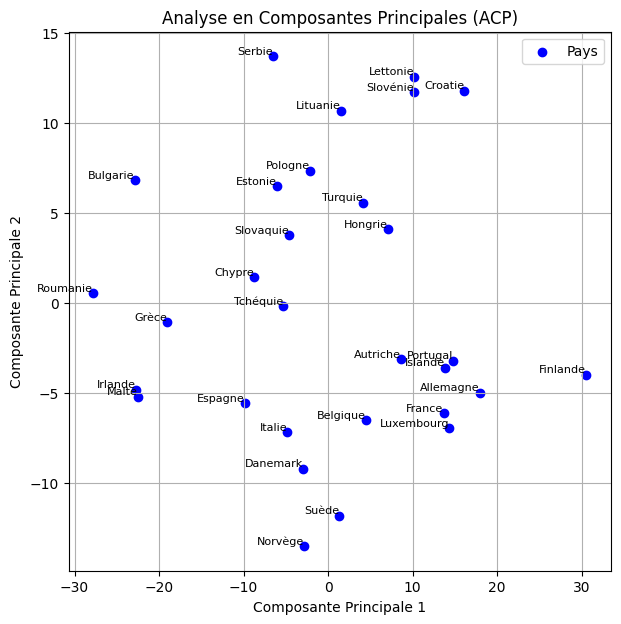

In [176]:
# Affichage des résultats de l'ACP avec noms des pays
plt.figure(figsize=(7, 7))
plt.scatter(df_pca['Composante_1'], df_pca['Composante_2'], color='blue', label='Pays')

# Ajout des noms de pays dans le nuage de points
for i, country in enumerate(pivot_df4['Geo']):  # Assurez-vous que 'Pays' est le nom de la colonne avec les noms des pays
    plt.text(df_pca['Composante_1'][i], df_pca['Composante_2'][i], country, fontsize=8, ha='right', va='bottom')

# Configuration du graphique
plt.title('Analyse en Composantes Principales (ACP)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.grid()
plt.legend()
plt.show()

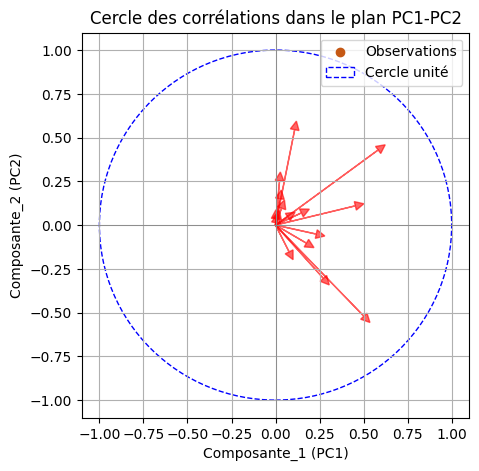

In [175]:
# Création de la figure
plt.figure(figsize=(5, 5))
plt.scatter(df_pca['Composante_1'], df_pca['Composante_2'], color='#c55814', label='Observations')

# Cercle des corrélations
n_pcs = pca.components_.shape[1]
for i in range(n_pcs):
    # Flèche représentant chaque variable dans le cercle de corrélation
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='red', alpha=0.6,
              head_width=0.05, head_length=0.05)

# Cercle unité pour délimiter la zone de corrélation maximale
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--', label='Cercle unité')
plt.gca().add_artist(circle)

# Configurations supplémentaires
plt.xlabel("Composante_1 (PC1)")
plt.ylabel("Composante_2 (PC2)")
plt.title("Cercle des corrélations dans le plan PC1-PC2")
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.show()

In [174]:
# Afficher la variance expliquée
print("Variance expliquée par chaque composante :", pca.explained_variance_ratio_)
print("Variance expliquée cumulée :", np.cumsum(pca.explained_variance_ratio_))

Variance expliquée par chaque composante : [0.61155139 0.18015032]
Variance expliquée cumulée : [0.61155139 0.79170171]



## II. Blessures lors d'accidents *(DataSet Groupe)* : Hamza OUADOUD

**1. Personnes déclarant un accident entraînant des blessures** par sexe, âge et **degré d'urbanisation**.



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Inspection des données :**
* Affichage des données bruts

In [136]:
df5 = eurostat.get_data_df('hlth_ehis_ac1u')
df5.sample(5)

,freq,accident,deg_urb,sex,age,unit,geo\TIME_PERIOD,2014,2019
13011,A,HOM_LEIS,TOTAL,M,Y65-74,PC,CY,4.3,2.9
4118,A,HOM,DEG3,M,Y15-29,PC,RS,NaN,0.0
19605,A,LEIS,TOTAL,M,Y20-24,PC,PL,2.1,NaN
1147,A,HOM,DEG1,T,TOTAL,PC,EE,3.5,5.3
24559,A,RD_TRF,DEG3,M,Y15-19,PC,IE,0.0,NaN


* Description des données : 

In [137]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27360 entries, 0 to 27359
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             27360 non-null  object 
 1   accident         27360 non-null  object 
 2   deg_urb          27360 non-null  object 
 3   sex              27360 non-null  object 
 4   age              27360 non-null  object 
 5   unit             27360 non-null  object 
 6   geo\TIME_PERIOD  27360 non-null  object 
 7   2014             26648 non-null  float64
 8   2019             18348 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.9+ MB


* Problèmes rencontrés :
    - Présence de colonnes inutiles.
    - Lignes contenant des valeurs nulles.
    - Colonnes avec des types de données inappropriés.
    - Colonnes illisibles.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Nettoyage des données :**
* Sélection des colonnes utiles : 

In [138]:
df5 = df5[['geo\\TIME_PERIOD','age','sex','accident','deg_urb','2019']]
df5.head(3)

,geo\TIME_PERIOD,age,sex,accident,deg_urb,2019
0,AT,TOTAL,F,HOM,DEG1,6.6
1,BE,TOTAL,F,HOM,DEG1,5.2
2,BG,TOTAL,F,HOM,DEG1,2.0


* Renommage des colonnes :

In [139]:
df5 = df5.rename(columns={
    'geo\\TIME_PERIOD':'Geo',
    'deg_urb':'Degré_urbanisation',
    'accident':'Accident'
})
df5.head(0)

,Geo,age,sex,Accident,Degré_urbanisation,2019


* Remplacement des codes pays par leur nom complet :

In [140]:
ds5_coutry_code = {
    "EU27_2020": "Union européenne - 27 pays (à partir de 2020)",
    "EU28": "Union européenne - 28 pays (2013-2020)",
    "BE": "Belgique",
    "BG": "Bulgarie",
    "CZ": "Tchéquie",
    "DK": "Danemark",
    "DE": "Allemagne",
    "EE": "Estonie",
    "IE": "Irlande",
    "EL": "Grèce",
    "ES": "Espagne",
    "FR": "France",
    "HR": "Croatie",
    "IT": "Italie",
    "CY": "Chypre",
    "LV": "Lettonie",
    "LT": "Lituanie",
    "LU": "Luxembourg",
    "HU": "Hongrie",
    "MT": "Malte",
    "NL": "Pays-Bas",
    "AT": "Autriche",
    "PL": "Pologne",
    "PT": "Portugal",
    "RO": "Roumanie",
    "SI": "Slovénie",
    "SK": "Slovaquie",
    "FI": "Finlande",
    "SE": "Suède",
    "IS": "Islande",
    "NO": "Norvège",
    "UK": "United Kingdom",
    "RS": "Serbie",
    "TR": "Turquie"
}
df5['Geo'] = df5['Geo'].replace(ds5_coutry_code)

* Remplacement des codes de sexe par leur nom complet :

In [141]:
df5['sex'] = df5['sex'].replace({'M': 'Male', 'F': 'Female','T':'Total'})

* Remplacement des codes d'Accident et Degré urbanisation :


In [142]:
# Suppression des lignes où 'Degré_urbanisation' contient 'TOTAL'
df5 = df5[~df5['Degré_urbanisation'].isin(['TOTAL'])]

ds5_accident_code = {
    "RD_TRF": "Trafic routier",
    "HOM_LEIS": "Domicile et loisir",
    "HOM": "Domicile",
    "LEIS": "Loisir"
}

ds5_Degré_urbanisation_code = {
    "DEG1": "Villes",
    "DEG2": "Villes_moins_peuplées_et_banlieues",
    "DEG3": "Zones_rurales"
}

# Remplacer les codes dans 'Accident' par les descriptions complètes
df5['Accident'] = df5['Accident'].replace(ds5_accident_code)

# Remplacer les codes dans 'Degré_urbanisation' par les descriptions complètes
df5['Degré_urbanisation'] = df5['Degré_urbanisation'].replace(ds5_Degré_urbanisation_code)

* Remplissage des valeurs manquantes pour l'année 2019 :


In [ ]:
# Remplir les valeurs manquantes de l'année 2019 par les valeurs de l'année précédente (2014)
df5['2019'] = df5.groupby('Geo')['2019'].fillna(method='ffill')

# Garder uniquement les lignes avec des données valides pour 2019 en cas que toutes les années contient des valeur null
df5 = df5[df5['2019'].notna()]  

* Filtrer le DataFrame pour inclure uniquement les lignes avec 'TOTAL' pour sexe

In [145]:
df5 = df5[df5['sex'] =="Total"]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Présentation des données final :**
* Affichage des données après nettoyage :

In [146]:
df5.sample(8)

,Geo,age,sex,Accident,Degré_urbanisation,2019
18783,Estonie,Y_GE75,Total,Loisir,Zones_rurales,3.3
7996,Irlande,TOTAL,Total,Domicile et loisir,Villes,4.7
18531,Portugal,Y25-34,Total,Loisir,Zones_rurales,1.0
1656,Croatie,Y_GE65,Total,Domicile,Villes,5.6
25477,Slovaquie,Y45-54,Total,Trafic routier,Zones_rurales,1.1
22054,Serbie,Y45-54,Total,Trafic routier,Villes,0.0
1484,Finlande,Y35-44,Total,Domicile,Villes,3.0
15283,Suède,Y55-64,Total,Loisir,Villes,5.4


* Pivotage des données :

In [147]:
# Création d'un tableau croisé dynamique à partir du DataFrame 'df'.
pivot_df5 = df5.pivot_table(
    index=['Geo','Degré_urbanisation'],  
    columns='Accident',  
    values='2019',  
).reset_index()

# Suppression des lignes contenant des valeurs manquantes (NaN) dans le DataFrame.
pivot_df5 = pivot_df5.dropna()

# Arrondi des valeurs numériques du DataFrame à deux décimales.
pivot_df5 = pivot_df5.round(2)

pivot_df5.head(6)

Accident,Geo,Degré_urbanisation,Domicile,Domicile et loisir,Loisir,Trafic routier
0,Allemagne,Villes,5.18,13.16,9.85,2.63
1,Allemagne,Villes_moins_peuplées_et_banlieues,5.53,13.70,10.07,2.24
2,Allemagne,Zones_rurales,5.22,12.21,8.41,2.14
3,Autriche,Villes,5.96,13.00,8.03,1.73
4,Autriche,Villes_moins_peuplées_et_banlieues,4.80,12.86,8.81,2.07
5,Autriche,Zones_rurales,5.27,11.82,7.22,1.64


* Sauvegarder le résultat

In [76]:
pivot_df.to_excel('Personnes_déclarant_accident_entraînant_blessures_par_sex_âge_degré_urbanisation_2019.xlsx', index=False)